<a href="https://colab.research.google.com/github/kishore779/Pytorch_Programming/blob/main/Pytorch_01_WorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pytorch Overflow
1.data
2:build model
3:training
4.make prediction
5.save and load model
6.put all together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cpu'

##Use linear regression formula to make straight line with known **parameters**

In [2]:
weight = 0.6
bias = 0.7

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X  + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.7000],
         [0.7120],
         [0.7240],
         [0.7360],
         [0.7480],
         [0.7600],
         [0.7720],
         [0.7840],
         [0.7960],
         [0.8080]]))

In [3]:
len(X),len(y)

(50, 50)

##Spilting the sata into training and testing for model

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data= X_train,
                     train_label=y_train,
                     test_data= X_test,
                     test_label = y_test,
                     predictions =None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c="b",s=4,label="Training data")

  plt.scatter(test_data,test_label, c="y", s=4, label="Training data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4, label ="Predictiond\s")

  plt.legend(prop={"size":14});

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3724627755.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.scatter(test_data,predictions,c="r",s=4, label ="Predictiond\s")


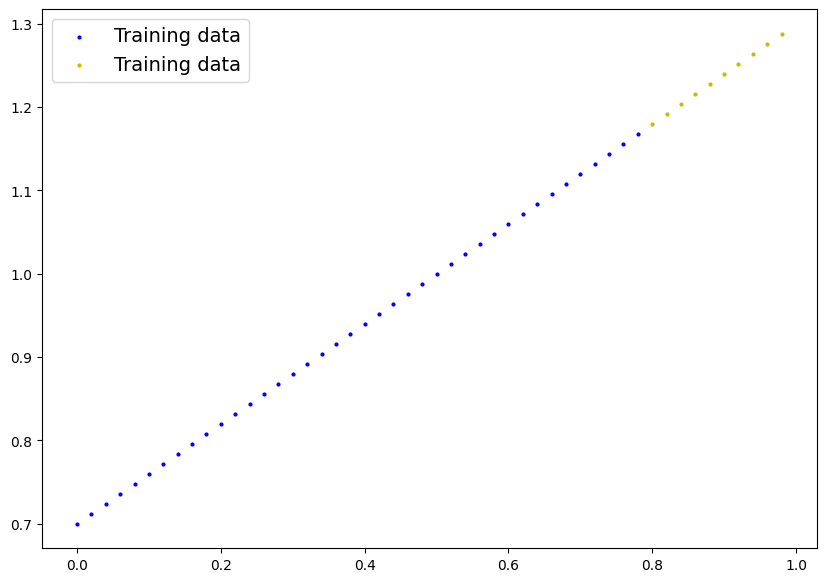

In [6]:
plot_predictions();

In [7]:
#Create linear reg model class
from torch import nn

class LinearRegressionModel(nn.Module):
   def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = float))
   def forward(self, x: torch.Tensor) ->torch.Tensor:
    return self.weights * x + self.bias

###Checking te contents of our Pytorch Model

In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [10]:
##prediction on the models

with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

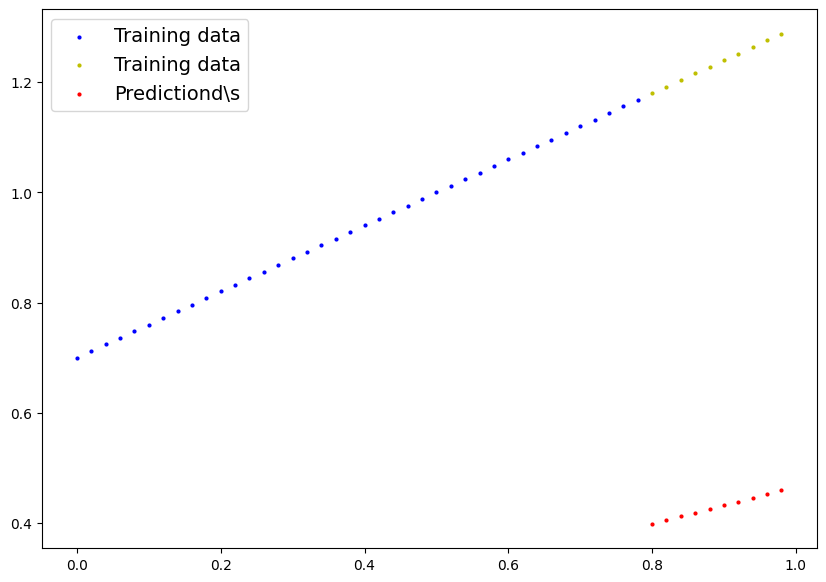

In [ ]:
plot_predictions(predictions = y_pred)

In [11]:
##loss fn
loss_fn = nn.L1Loss()
loss_fn

##optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

##Building a training loop (and testing loop) in pytorch

In [15]:
torch.manual_seed(42)
#epoch is a one loop through the data
epochs = 1000

epoch_count = []
loss_values =[]
test_loss_values =[]

for epoch in range(epochs):

  model_0.train()

  #forward pass
  y_pred = model_0(X_train)

  #Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #Optimizer zero grad
  optimizer.zero_grad()

  #perform backpropagation
  loss.backward()

  #step the optimizer
  optimizer.step()



  ## Testing the data
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if(epoch % 10 == 0):
    epoch_count.append(epoch)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())

    print(f"Epoch : {epoch} | Loss : {loss} | Test_loss : {test_loss}")

    print(model_0.state_dict())


Epoch : 0 | Loss : 0.5586713529439554 | Test_loss : 0.6694791037882671
OrderedDict({'weights': tensor([0.3761], dtype=torch.float64), 'bias': tensor([0.2298], dtype=torch.float64)})
Epoch : 10 | Loss : 0.5471503530075907 | Test_loss : 0.6560081038236832
OrderedDict({'weights': tensor([0.3800], dtype=torch.float64), 'bias': tensor([0.2398], dtype=torch.float64)})
Epoch : 20 | Loss : 0.535629353071226 | Test_loss : 0.6425371038590995
OrderedDict({'weights': tensor([0.3839], dtype=torch.float64), 'bias': tensor([0.2498], dtype=torch.float64)})
Epoch : 30 | Loss : 0.5241083531348615 | Test_loss : 0.6290661038945156
OrderedDict({'weights': tensor([0.3878], dtype=torch.float64), 'bias': tensor([0.2598], dtype=torch.float64)})
Epoch : 40 | Loss : 0.5125873531984967 | Test_loss : 0.6155951039299316
OrderedDict({'weights': tensor([0.3917], dtype=torch.float64), 'bias': tensor([0.2698], dtype=torch.float64)})
Epoch : 50 | Loss : 0.501066353262132 | Test_loss : 0.6021241039653478
OrderedDict({'we

In [17]:
 with torch.inference_mode():
  y_pred_new = model_0(X_test)

In [20]:
import numpy as np

np.array(torch.tensor(loss_values).numpy()),test_loss_values

(array([5.58671355e-01, 5.47150373e-01, 5.35629332e-01, 5.24108350e-01,
        5.12587368e-01, 5.01066327e-01, 4.89545345e-01, 4.78024364e-01,
        4.66503352e-01, 4.54982340e-01, 4.43461359e-01, 4.31940347e-01,
        4.20419365e-01, 4.08898354e-01, 3.97377342e-01, 3.85856360e-01,
        3.74335349e-01, 3.62814367e-01, 3.51293355e-01, 3.39772344e-01,
        3.28251362e-01, 3.16730350e-01, 3.05209368e-01, 2.93688357e-01,
        2.82167345e-01, 2.70646363e-01, 2.59125352e-01, 2.47604355e-01,
        2.36083359e-01, 2.24562362e-01, 2.13041350e-01, 2.01520354e-01,
        1.89999357e-01, 1.78478360e-01, 1.66957349e-01, 1.55436352e-01,
        1.43915355e-01, 1.32394359e-01, 1.20873354e-01, 1.09352358e-01,
        9.78313535e-02, 8.63103569e-02, 7.47893527e-02, 6.32683560e-02,
        5.17473556e-02, 4.02263552e-02, 2.87053566e-02, 1.71843562e-02,
        9.54412390e-03, 7.12638441e-03, 6.33713603e-03, 5.90833323e-03,
        5.55787049e-03, 5.20887086e-03, 4.86499071e-03, 4.521796

In [16]:
weight, bias

(0.6, 0.7)

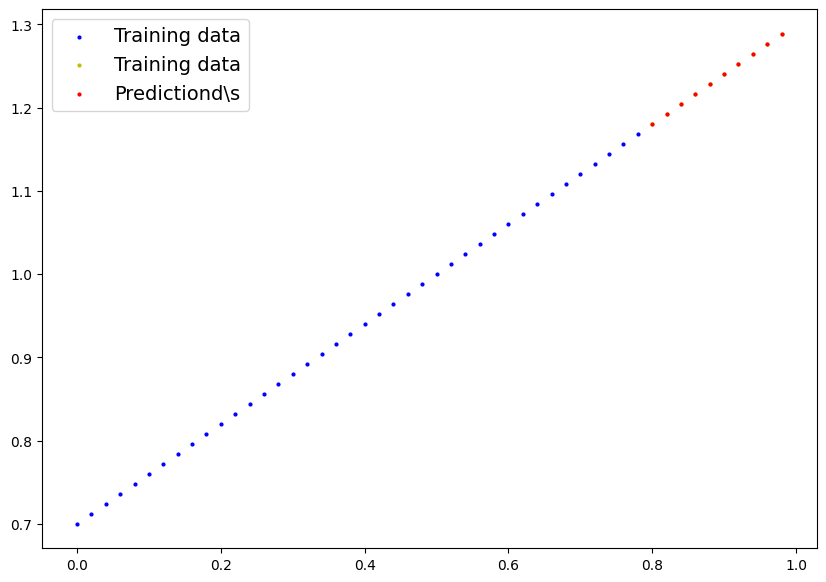

In [18]:
plot_predictions(predictions=y_pred_new)

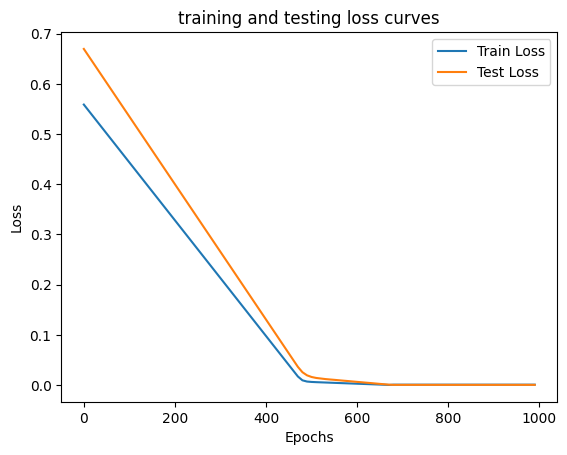

In [21]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label = "Train Loss")
plt.plot(epoch_count,test_loss_values, label = "Test Loss")
plt.title("training and testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();